In [1]:
from business_models import hahn, greenplum

import h3

from shapely.geometry import shape,Point,Polygon

import geopandas as gpd

import pandas as pd

import numpy as np

from shapely import wkt


# import geo_functions as gf

import os

import geo_functions as gf

from shapely import wkt

from datetime import datetime


import zone_prediction_functions as zpf

from importlib import reload
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt

In [7]:
reload(zpf)

<module 'zone_prediction_functions' from '/home/intra26/zone_prediction_functions.py'>

In [ ]:
# Для расчета дистанции важно, чтобы все текущие зоны имели тип external_id + '_' +delivery_type
# все текущие сторы - external_id

In [2]:
case_scen = 'dolgop'
list_scenarios = ['Сценарий 2: новая точка']

In [1]:
def get_point_geometry(x):
    if x.isnumeric():
        geo = wkt.loads(greenplum("select st_astext(geometry) from snb_geo_lavka.lavka_stores where external_id ='{}'".format(x)).iloc[0].values[0])
    else:
        try:
            geo = wkt.loads(x)
        except:
            geo=''
            print(x)
    return geo

In [3]:
def receive_intersected_zones(gdf_zones):
    
    list_zones= gdf_zones.zone_id.unique().tolist()
   
    gdf_inter_current_new_zones = zpf.receive_intersected_zones( list_zones)
    
    gdf_inter_current_new_zones['zone_id'] = gdf_inter_current_new_zones['current_zone']+'_'+gdf_inter_current_new_zones['delivery_type']
    
   
    gdf_inter_current_new_zones['geometry'] = gdf_inter_current_new_zones['current_zone_geometry']

    gdf_inter_current_new_zones['geometry_wkb']=None

    gdf_inter_current_new_zones['geometry'] = gdf_inter_current_new_zones.geometry.apply(lambda x: x.buffer(0.001).buffer(-0.001) if x.geom_type=='MultiPolygon'  else x)

    gdf_inter_current_new_zones['upload_dt']=datetime.today()
    return gdf_inter_current_new_zones, gdf_inter_current_new_zones[['zone_id','upload_dt','geometry','geometry_wkb']], gdf_inter_current_new_zones[gdf_inter_current_new_zones.inter_share<1][['zone_id','upload_dt','geometry','geometry_wkb']]
    
 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


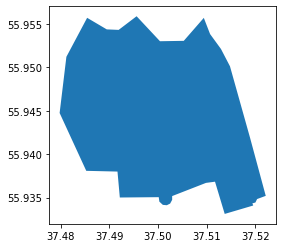

In [8]:
gdf_zones1= zpf.get_gdf2upload(data_source ='db',lavka_ids = ['245674'],delivery_type='foot',geometry_col='geometry_zone' )

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


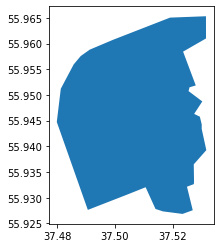

In [11]:
gdf_zones2= zpf.get_gdf2upload(data_source ='file_geo',file_name='dolgop_old_borders.geojson',geometry_col='geometry')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


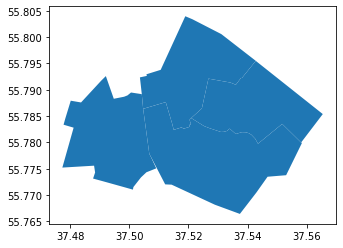

In [28]:
gdf_zones= zpf.get_gdf2upload(data_source ='db',lavka_ids = ['185748',
'375798',
'201043',
'124845'],delivery_type='foot',geometry_col='geometry_zone' )

In [29]:
gdf_zones

,zone_id,geometry_zone,upload_dt,geometry_wkb,geometry
0,375798_foot,"POLYGON((37.506771 55.777834,37.507451 55.7771...",2022-02-11 13:51:08.140180,None,"POLYGON ((37.50677 55.77783, 37.50745 55.77712..."
1,124845_foot,"POLYGON((37.477392 55.775214,37.488114 55.7755...",2022-02-11 13:51:08.140180,None,"POLYGON ((37.47739 55.77521, 37.48811 55.77557..."
2,185748_foot,"POLYGON((37.512328 55.787653,37.514483 55.7835...",2022-02-11 13:51:08.140180,None,"POLYGON ((37.51233 55.78765, 37.51448 55.78358..."
3,201043_foot,"POLYGON((37.565382 55.785379,37.542738 55.7954...",2022-02-11 13:51:08.140180,None,"POLYGON ((37.56538 55.78538, 37.54274 55.79548..."


In [31]:
zpf.save2db(gdf_zones[['geometry', 'geometry_wkb', 'upload_dt', 'zone_id'] ])

appended
zones ['375798_foot', '124845_foot', '185748_foot', '201043_foot'] are successfuly uploaded


In [183]:
gdf_zones1

,zone_id,geometry,upload_dt,geometry_wkb
0,245674_foot,"POLYGON ((37.48527 55.93808, 37.47979 55.94474...",2022-02-10 20:49:56.838885,None


In [12]:
gdf_zones2['zone_id']='245674_foot_old'

In [13]:
gdf_zones = pd.concat([gdf_zones1,gdf_zones2])

In [14]:
gdf_zones

,zone_id,geometry_zone,upload_dt,geometry_wkb,geometry
0,245674_foot,"POLYGON((37.485266 55.938079,37.479789 55.9447...",2022-02-10 21:09:35.704789,None,"POLYGON ((37.48527 55.93808, 37.47979 55.94474..."
0,245674_foot_old,NaN,2022-02-10 21:10:09.297704,None,"POLYGON ((37.47979 55.94474, 37.48118 55.95121..."


In [87]:
reload(zpf)

<module 'zone_prediction_functions' from '/home/intra26/zone_prediction_functions.py'>

In [188]:
df_inter_areas, df2scen, df2db  = receive_intersected_zones(gdf_zones)

names2change = df_inter_areas.loc[(df_inter_areas.zone_id == df_inter_areas.proposed_zone)&(df_inter_areas.inter_share<1),'proposed_zone'].values

gdf_zones.loc[gdf_zones.zone_id.isin(names2change),'zone_id'] =  gdf_zones.loc[gdf_zones.zone_id.isin(names2change),'zone_id']+case_scen

gdf_zones2db = pd.concat([gdf_zones,df2db])


In [193]:
df2scen

,zone_id,upload_dt,geometry,geometry_wkb
0,245674_foot,2022-02-10 20:51:07.803536,"POLYGON ((37.48527 55.93808, 37.47979 55.94474...",None


In [189]:
gdf_zones2db

,zone_id,geometry,upload_dt,geometry_wkb
0,245674_foot,"POLYGON ((37.48527 55.93808, 37.47979 55.94474...",2022-02-10 20:49:56.838885,None
0,245674_foot_old,"POLYGON ((37.47979 55.94474, 37.48118 55.95121...",2022-02-10 20:49:17.910525,None


In [190]:
zpf.save2db(gdf_zones2db)

appended
zones ['245674_foot', '245674_foot_old'] are successfuly uploaded


In [195]:
# плохой вариант : сценарий это зона +точка, а не только зона
dict_scenarios = {'245674_foot':'Сценарий 2: текущая зона, новая точка', '245674_foot_old':'Сценарий 3: старая зона, новая точка'}

gdf_zones['scenarios']=gdf_zones['zone_id'].map(dict_scenarios)

In [196]:

gdf_zones_scen = pd.concat([gdf_zones,df2scen])

In [201]:
gdf_zones_scen.columns

Index(['zone_id', 'geometry', 'upload_dt', 'geometry_wkb', 'scenarios'], dtype='object')

In [15]:
def create_scenarious(gdf_zones, case, type_hist, type_predict='foot'):

    
    df_scen_new = gdf_zones[['zone_id','scenarios','store']]
    df_scen_new['courier_type_hist']=type_hist
    df_scen_new['courier_type_predict']=type_predict
    df_scen_new['case']=case
#     df_scen_new['store_id'] = df_scen_new['zone_id'].apply(lambda x: x.split('_')[0])
    df_scen_new.reset_index(inplace=True)
    df_scen_new.drop( 'index', axis=1, inplace=True)
    return df_scen_new

In [16]:
gdf_zones_scen= pd.read_csv('dolgop_scenarious.csv', sep=';')

In [203]:
gdf_zones_scen

,zone_id,geometry,upload_dt,geometry_wkb,scenarios,store
0,245674_foot,"POLYGON ((37.48527 55.93808, 37.47979 55.94474...",2022-02-10 20:49:56.838885,None,"Сценарий 2: текущая зона, новая точка",245674_new1
1,245674_foot_old,"POLYGON ((37.47979 55.94474, 37.48118 55.95121...",2022-02-10 20:49:17.910525,None,"Сценарий 4: старая зона, новая точка",245674_new1
2,245674_foot,"POLYGON ((37.48527 55.93808, 37.47979 55.94474...",2022-02-10 20:51:07.803536,None,Сценарий 1: ASIS,245674
3,245674_foot_old,"POLYGON ((37.47979 55.94474, 37.48118 55.95121...",2022-02-10 20:49:17.910525,NaN,"Сценарий 3: старая зона, старая точка",245674


In [17]:
df_scenarios = create_scenarious(gdf_zones_scen, case_scen, type_hist='foot', type_predict='foot')






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df_scenarios

,zone_id,scenarios,store,courier_type_hist,courier_type_predict,case
0,245674_foot,"Сценарий 2: текущая зона, новая точка",245674_new1,foot,foot,dolgop
1,245674_foot_old,"Сценарий 4: старая зона, новая точка",245674_new1,foot,foot,dolgop
2,245674_foot,Сценарий 1: ASIS,245674,foot,foot,dolgop
3,245674_foot_old,"Сценарий 3: старая зона, старая точка",245674,foot,foot,dolgop


In [ ]:
## Нужно предусмотреть ввод точек через словарь или файл

In [19]:

new_point = Point(
37.499032,55.937564)

## здесь добавить цикл по количеству сценариев , формат точки : newN



In [20]:
df_scenarios.rename(columns={'store':'store_id'}, inplace=True)

In [ ]:
# Другой тип кейса, когда для новой зоны старый стор
# greenplum("""
# insert into analyst.iat_zones_stores_geometry (zone_id,store_id,geometry)
# select ts.zone_id, ts.store_id, st_astext(geometry)
# from analyst.iat_cases_scenarios_predict_metadata ts
# join snb_geo_lavka.lavka_stores  ls on  external_id =ts.store_id
where scenarios = 'Сценарий 2: Оптимальные границы'""")

In [21]:
df_scenarios

,zone_id,scenarios,store_id,courier_type_hist,courier_type_predict,case
0,245674_foot,"Сценарий 2: текущая зона, новая точка",245674_new1,foot,foot,dolgop
1,245674_foot_old,"Сценарий 4: старая зона, новая точка",245674_new1,foot,foot,dolgop
2,245674_foot,Сценарий 1: ASIS,245674,foot,foot,dolgop
3,245674_foot_old,"Сценарий 3: старая зона, старая точка",245674,foot,foot,dolgop


In [25]:
greenplum("""delete from analyst.iat_cases_scenarios_predict_metadata where "case"='{}'""".format(case_scen))
greenplum.write(df_scenarios, 'analyst.iat_cases_scenarios_predict_metadata', if_exists='append')

In [22]:
gdf_stores = df_scenarios[df_scenarios.scenarios!='Сценарий 1: ASIS'][['zone_id', 'store_id']]

gdf_stores['geometry'] = new_point

gdf_stores['geometry_wkb']=None

In [23]:
gdf_stores

,zone_id,store_id,geometry,geometry_wkb
0,245674_foot,245674_new1,POINT (37.499032 55.937564),None
1,245674_foot_old,245674_new1,POINT (37.499032 55.937564),None
3,245674_foot_old,245674,POINT (37.499032 55.937564),None


In [24]:
for n, r in gdf_stores.iterrows():
    greenplum("""delete from analyst.iat_cases_scenarios_predict_metadata where zone_id='{}' and store_id='{}'""".format(r['zone_id'],r['store_id']))

greenplum.write(gdf_stores, 'analyst.iat_zones_stores_geometry', if_exists='append')

In [33]:
case_scen = input("case name:")
df_scen_new = greenplum("""select * from analyst.iat_cases_scenarios_predict_metadata  where "case" ='{}' """.format(case_scen))
print(df_scen_new)

case name:msk_makeeva
                 scenarios      zone_id courier_type_hist  \
0  Сценарий 2: новая точка  120345_foot              foot   
1         Сценарий 1: ASIS  120345_foot              foot   

  courier_type_predict         case     store_id  
0                 foot  msk_makeeva  120345_new1  
1                 foot  msk_makeeva       120345  


In [ ]:
add_new_point(geometry_point, case_name):
    

<AxesSubplot:>

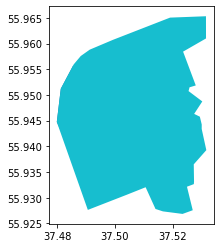

In [27]:
gdf_zones.plot(column='zone_id')